# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [25]:
## libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from statsmodels.stats.outliers_influence import OLSInfluence as olsi
import statsmodels.api as sm

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [3]:
# Your code here

## create our dataframe
age = [17,51,27,21,36,48,19,26,54,30]
tardies = [10,1,5,9,4,2,9,6,0,3]

student_data = pd.DataFrame({'Age': age, 'Tardies': tardies})

In [4]:
student_data.head()    ## see the head

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4


Draw a dispersion diagram (scatter plot) for the data.

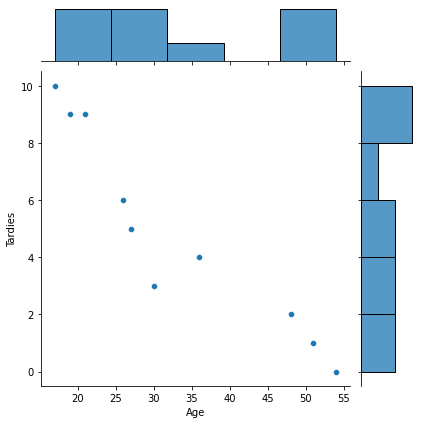

In [7]:
# Your code here.
sns.jointplot(data=student_data, x="Age", y="Tardies")    ## the the data distribution (dispersion and histogramms)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Your response here. 
## linear relation - increase of age decrease the time late

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [11]:
# Your response here.
#correlation:
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [12]:
#covariance:
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [ ]:
## both covariance and correlation tell us how the data is related and if the data have a linear relationship
## correlation is the scaled version of covariance, and have a value between -1 and 1 and tell us how strong the relationship is.
## covariance tell us how the two variables are related (linear relationship) but is affected by scale.
## The units of covariance are the multiplication of the two variable units
## Both tell us the direction of the relation of the two variables
## in this case we have a negative correlation and covariance (means while one variable increases, the other decreases)

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [16]:
# Your response here.
model = linear_model.LinearRegression()     ## create a linear model
x = student_data[["Age"]]                   ## x axis will be the age
y = student_data["Tardies"]                 ## y axis will be the time late
result = model.fit(x,y)                     ## we fit our data in the model 
display(result.intercept_)                  ## we see here our linear model intercepts the y line
display(result.coef_)                       ## we see our slope

12.888803363135768

array([-0.24282077])

Plot your regression model on your scatter plot.

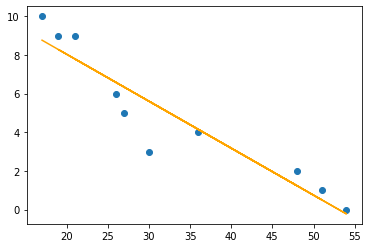

In [17]:
# Your code here.
regression_line = result.intercept_ + result.coef_[0]*x          ## create our regression line
plt.plot(x, regression_line, c = 'orange')                       ## plot our regression line
plt.scatter(x,y)                                                 ## plot our individual points
plt.show()                                                       ## show everything

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [19]:
# Your response here. 
#sklearn models show R^2 as a score by default
result.score(x,y)     ## score of 0.88 in a scale 0 to 1

0.8820265558250109

In [21]:
## is a good indicator of tardiness

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [23]:
# Import any libraries you may need & the data
## data
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [26]:
# Your response here.
vehicles_selected = vehicles[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']]
vehicles_selected.corrwith(vehicles['CO2 Emission Grams/Mile'])

Year                -0.222300
Cylinders            0.752393
Fuel Barrels/Year    0.986189
Combined MPG        -0.926229
Fuel Cost/Year       0.930865
dtype: float64

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [29]:
# Your response here. 
model = linear_model.LinearRegression()                                                                 ## create a linear model
x = vehicles[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']]                  ## x axis will be the different variables
y = vehicles['CO2 Emission Grams/Mile']                                                                 ## y axis will be our target
result = model.fit(x,y)                                                                                 ## we fit our data in the model 
display(result.coef_)                                                                                   ## we see our coef with the different variables
result.score(x,y)                                                                                       ## see the score

array([-0.32061673,  1.87879976, 19.05292507, -3.04039938,  0.03230948])

0.9808734920269122

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 

## confident. the model have a 0.98 score in a range of 0 to 1
## Com bined MPG have the higher influence comparatively with the other variables (value most different from 0)

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [26]:
# Your code here.
## create our dataframe
p_invited = [1,3,4,6,8,9,11,14]
p_attended = [1,2,4,4,5,7,8,13]

party = pd.DataFrame({'P_invited': p_invited, 'P_attended': p_attended})

In [27]:
model = linear_model.LinearRegression()     ## create a linear model
x = party[["P_invited"]]                    ## x axis will be the people invited
y = party["P_attended"]                     ## y axis will be the people attended
result = model.fit(x,y)                     ## we fit our data in the model 
display(result.intercept_)                  ## we see here our linear model intercepts the y line
display(result.coef_)                       ## we see our slope

-0.43939393939393945

array([0.84848485])

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

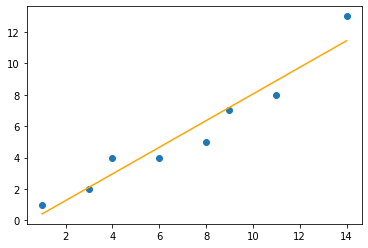

In [28]:
# Your code here.
regression_line = result.intercept_ + result.coef_[0]*x          ## create our regression line
plt.plot(x, regression_line, c = 'orange')                       ## plot our regression line
plt.scatter(x,y)                                                 ## plot our individual points
plt.show()                                                       ## show everything

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [29]:
# Your response here. 
## Positive correlation between both variables (0.96)
## slope positive
## meaning increase of people invited is linear related with people attending

In [30]:
result.score(x,y)   ## we have a score of 0.93 in a range oof 0 to 1

0.9316696375519905

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

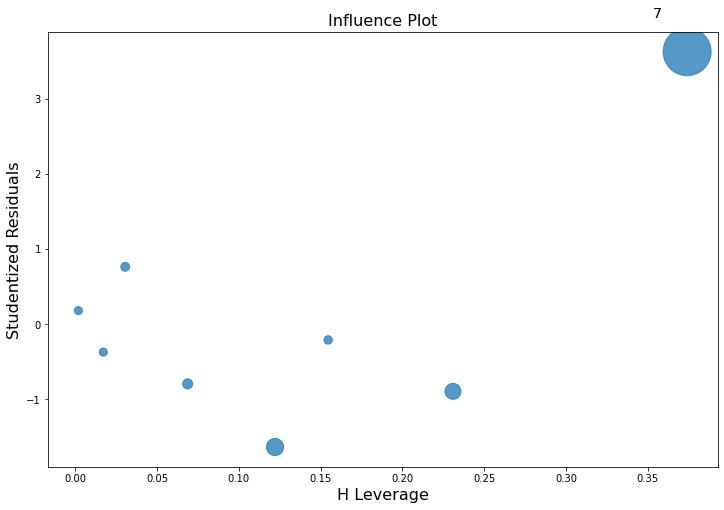

In [31]:
# Your response here
## let calculate outliers and influence measure
x1 = party["P_invited"].values
y1 = party["P_attended"].values
lm = sm.OLS(y1, x1).fit()

studentized_residuals = olsi(lm).resid_studentized
leverage_pts = olsi(lm).hat_matrix_diag
cook_dist = olsi(lm).cooks_distance

fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(lm, alpha  = 0.05, ax = ax, criterion="cooks")

In [32]:
# identify outliers in the training dataset
party.drop(7,inplace=True)    ## lets drop the 7


In [33]:
model = linear_model.LinearRegression()         ## create a new linear model
x = party[["P_invited"]]                        ## x axis will be the people invited
y = party["P_attended"]                         ## y axis will be the people attended
new_result = model.fit(x,y)                     ## we fit our data in the model 
display(new_result.intercept_)                  ## we see here our linear model intercepts the y line
display(new_result.coef_)                       ## we see our slope

0.32330827067669254

array([0.68421053])

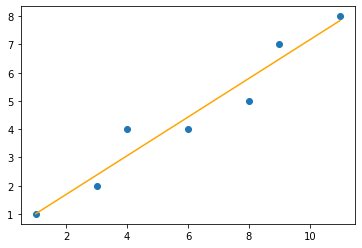

In [34]:
# Your code here.
regression_line_new = new_result.intercept_ + new_result.coef_[0]*x          ## create our regression line
plt.plot(x, regression_line_new, c = 'orange')                               ## plot our regression line
plt.scatter(x,y)                                                             ## plot our individual points
plt.show()                                                                   ## show everything

In [36]:
new_result.score(x,y)   ## we have a score of 0.93 in a range of 0 to 1

0.9433811802232855

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [24]:
# Your response here. 
## we improved from 0.93 to 0.94. Its not a big difference.

array([0.85201794])